<a href="https://colab.research.google.com/github/mandricic/CS5062/blob/master/etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etivity 1: Exploratory Data Analysis (EDA)**

This lab exercise demonstrates EDA of an Bank dataset with the Python modules Pandas, Numpy, Matplotib and Seaborn. 

# **A. Importing Modules and Dataset**

In [0]:
# The Python modules uses in this tutorial are:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **B. Load Bank file**

In [0]:
# Load file
df = pd.read_csv('https://raw.githubusercontent.com/mandricic/CS5062/master/bank.csv')  

# **QUESTION to answer by exploring bank dataset**
1. what is the most dependent on Client Subscription<br/>
     a.) Number of calls VS Call duration<br/>
     b.) Can we have too much calls per client<br/>
2. Is different age group more prone to subscribing
3. Would use of different contact type have any influence on Subscription?


# **C. Quick Data Exploration**

1. We will start with look at the first and the last 10 data rows with the data frame methods head() and tail(), respectively.

In [0]:
# Print first 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [0]:
# Print last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [0]:
# Check how many records is in bank Dataset
df['subscribed'].count()

2000

# **C.1. Quick Examination of total records**
**Dataset has 2000 data rows.**<br/>
I used '**subscribed**' attribute for the count because, that attribute doesn’t have NULL value.
**Subscribed** attribute can be set to Yes or No.

This exercise is focusing to find out what can affect subscribed attribute to be set to yes.
To get answer for that, I will look mostly at Attributes **duration**, **campaign** and **Previous**






# **C.2. Quick Examination of Numerical Attributes**

In [0]:
# Get list and details of numerical attributes
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Age**- We have 2000 records in the Bank dataset, 12 values are missing<br/>
**pdays** - we can see that there are Clients that were not previously contacted (min = -1)<br/>
**campaign** - is numeric attribute that contains number of calls to single Client for current campaign. Average time each Client was contacted was 1.909<br/>
**previous** - is numeric attribute that contains the number of calls performed to single client before current campaign. On previous campaign, average time of call was 2.5 per Client<br/>
**duration** - is numeric attribute that contains value for total duration of the calls per Client


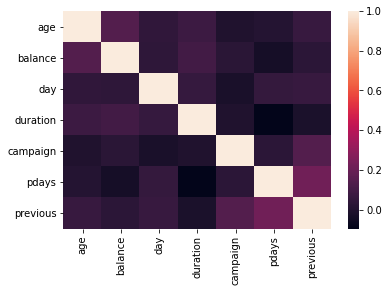

In [0]:
#correlation matrix
sns.heatmap(df.corr());

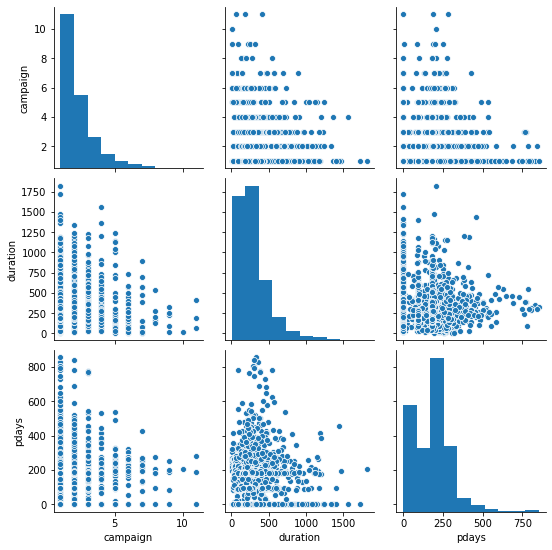

In [0]:
# by using method dropna() we will remove all rows with missing values 
sns.pairplot(data=df[['campaign','duration','pdays']].dropna())
plt.show()

# **C.3. Quick Examination of Categorical Attributes**
Categorical (non-numerical) attributes that I will examine are:<br/>
**contact** - this attribute contains communication type which can be 'cellular' or 'telephone'<br/>
**subscribed** - this attribute displays value "yes" or "no" - represents if clients has subscribed or not<br/>
**poutcome** - this attribute displays outcome of the previous marketing campaign: 'failure',’other’,'success'


In [0]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [0]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [0]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

**Cellular** is used as main contact device<br/>
we can notice that result for previous campaign is not very good, as we have 955 results for failure under poutcome <br/>
There is equal amount of people that is subscribed and that are not


# **D. Distribution Analysis for Numerical Attributes** 

For Numerical values, I will look into the numerical attributes previous and campaign.

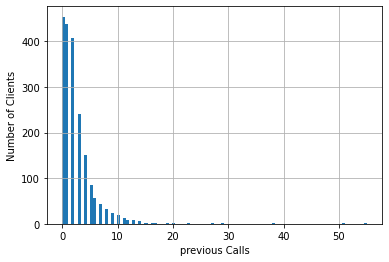

In [0]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['previous'].hist(bins=100)
plt.xlabel('previous Calls')
plt.ylabel('Number of Clients')
plt.show()

In the histogram above, we can see that there is the highest number of Clients that previously didn’t receive any call.<br/>
There is high enough number of clients that received one call, and just little bit less of clients that received 2 calls.<br/>
After that we can see drop in the amount off calls - there is just around 250 Clients that received 3 calls, just around 150 Clients that received 4 calls and so on.<br/>
Interesting part is that some clients received more than 50 calls, which sounds a bit too much.


By looking into boxp lots we can see the distribution better.

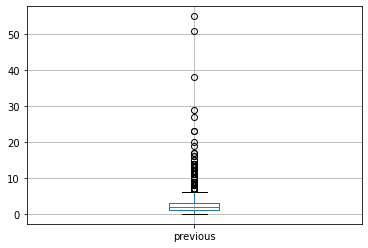

In [0]:
df.boxplot(column='previous')
plt.show()

The box plot above confirms that there is less client that received many calls

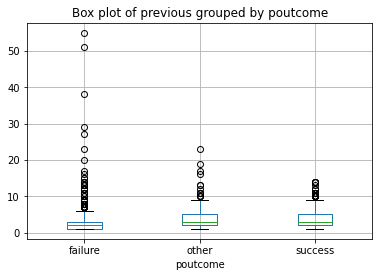

In [0]:
# Boxp lots of previous, grouped by the categorical attribute poutcome
df.boxplot(column='previous', by='poutcome')
plt.title('Box plot of previous grouped by poutcome')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

By looking at boxplot above, we can see that less call result in success.

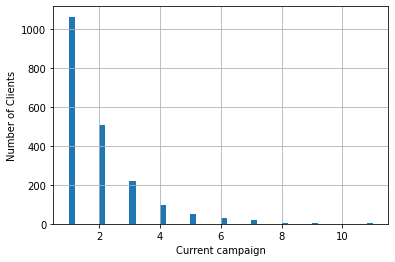

In [0]:
# Now we can look at current campaign

df['campaign'].hist(bins=50)
plt.xlabel('Current campaign')
plt.ylabel('Number of Clients')
plt.show()

In the histogram above, we can see that there is the highest number of Clients that received 1 call - more than 1000. <br/>
There is around 450 Clients that received 2 calls. <br/>
There is very small amount of Clients that received more than 5 calls

By looking into boxp lots we can see the distribution better.

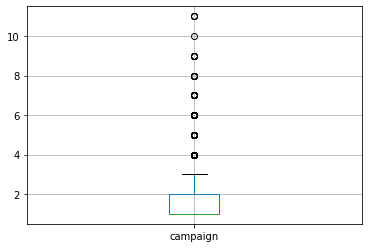

In [0]:
df.boxplot(column='campaign')
plt.show()

The box plot above confirms that under current campaign, the most clients were contacted 1-2 times

Now I can compare Previous Attribute with Campaign Attribute


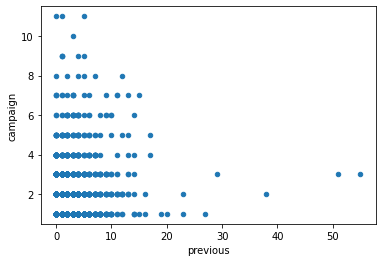

In [0]:
df.plot.scatter(x='previous', y='campaign')
plt.show()

From this scatter plot we can see that there are much more calls made per single user under previous calls, then what is made under current campaign. This is as expected, because previous calls contains number of several previous campaigns.  <br/>
In both attributes we can notice that there is much more clients who got less amount of calls .

# **E. Box Plot Variations**

First I will draw the box plots of age grouped by the categorical attribute Subscribed as violin plots. To see if there is any interesting connection between age and Subscribed User

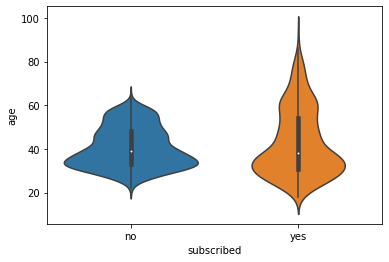

In [0]:
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

We can see that **clients** **over 65 and under 20** are all **subscribed**

To confirm this, we can filter out Clients by age

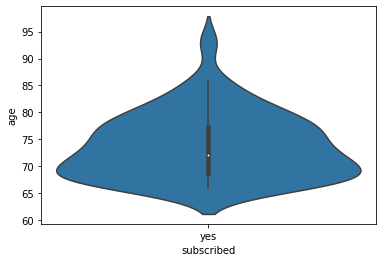

In [0]:
sns.violinplot(data=df.loc[df['age'] >65], x='subscribed', y='age' )
plt.show() 

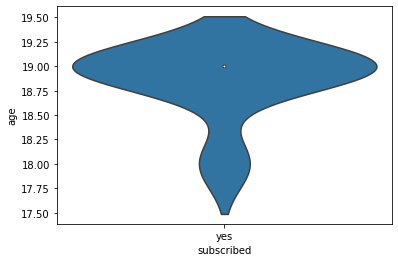

In [0]:
sns.violinplot(data=df.loc[df['age'] <20], x='subscribed', y='age' )
plt.show() 

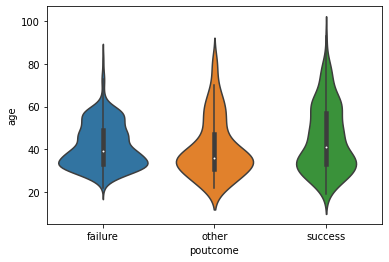

In [0]:
sns.violinplot(data=df.notna(), x='poutcome', y='age')
plt.show()

We can see similar result for poutcome. Clients over 60 and under 20 are most likely so have poutcome set to "Success" 

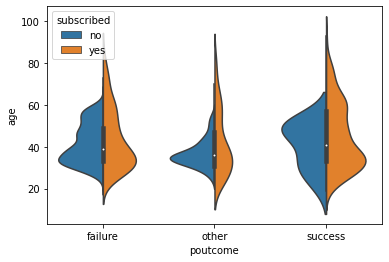

In [0]:
sns.violinplot(data=df[df['age'].notnull()], x='poutcome', y='age', hue='subscribed', split=True)
plt.show()

By looking at the plot we can see that previous status of "Other" is least favourite option.  and for that option Clients that are age between 20 and 60 are most likely to not subscribe 

I will also check if there is any effect of number of calls on success . For this I will look at values from previous campaign.
<BR/>
Attributes **poutcome** and **previous**

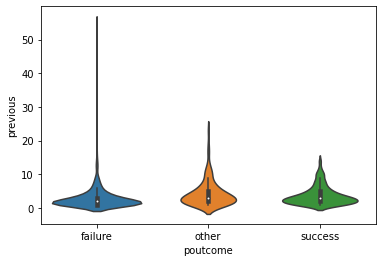

In [0]:
sns.violinplot(data=df, x='poutcome', y='previous')
plt.show()

The plot above it shows that for previous calls, success was achieved when calls were not made more than 18 times.

# **F. Distribution Analysis for Categorical Attributes**

Attribute that I want to understand better is **subscribed**. That is categorical attribute with two values:<br/>
<br/>
yes - Client is subscribed<br/>
no - Client is not subscribed<br/>

I will look at what are chances for Client to get subscribed, based on the number of calls for current campaign

In [0]:
frequency_table = df['campaign'].value_counts(ascending=True)
print('Frequency Table for current campaign:') 
print(frequency_table)

Frequency Table for current campaign:
10       1
11       3
9        5
8        6
7       17
6       31
5       50
4       99
3      219
2      506
1     1063
Name: campaign, dtype: int64


We can see that number of calls decreases per Client. The highest amount off cals that was done per client is "1"

In [0]:
pivot_table_subscribed = df.pivot_table(values='subscribed',
                                index='campaign',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
# Print pivot table
print(pivot_table_subscribed)

          subscribed
campaign            
1           0.509878
2           0.480237
3           0.561644
4           0.474747
5           0.400000
6           0.419355
7           0.294118
8           0.500000
9           0.400000
10          0.000000
11          0.666667


To understand result better, we need to look at last two results:<br/>
Under "**Frequency Table for current campaign**" we can see that there were only 3 clients that received 11 Calls.<br/>
Under **pivot_table_subscribed** we can see that for Clients who were contacted 11 times, 66% subscribed. Which means that 2 out of 3 clients subscribed after 11 calls.

Under **Frequency Table for current campaign** we can see that there were 1063 clients that received just 1 Call.<br/>
Under **pivot_table_subscribed** we can see that for Clients who were contacted 1 time, 51% subscribed. Which means that 542 out of 1063 clients subscribed after 1 call.


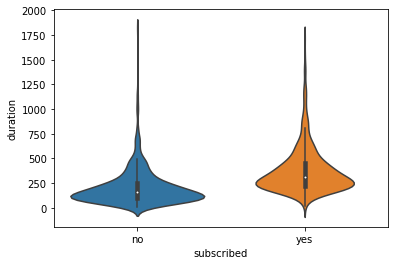

In [0]:
sns.violinplot(data=df, x='subscribed', y='duration')
plt.show()

violinplot shows that duration of the call affects subscription status.<br/>
Longer calls will get more subscriptions, and this would be the same for cellular and for the telephones.<br/>
Duration attribute contains total value for all calls per client
this is important to notice, because in previous result, we noticed that there is most users with only 1 call and from those users 51% people subscribe. That leads us to conclusion that it is more important length of the call, then number of the calls.


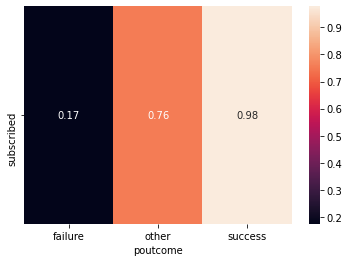

In [0]:
pivot_table_LCG = df.pivot_table(values='subscribed',  
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

If we look at outcome from previous campaign and for effect they have on subscription. We can see that if poucome was set to success, there is 98% chance that client will be subscribed. Where for poucome with status failure there is big chance that subscribed will be negative.

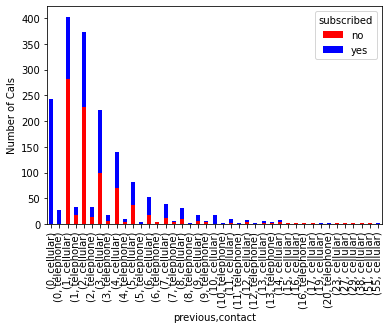

In [0]:
 

crosstab_CGL = pd.crosstab([df['previous'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

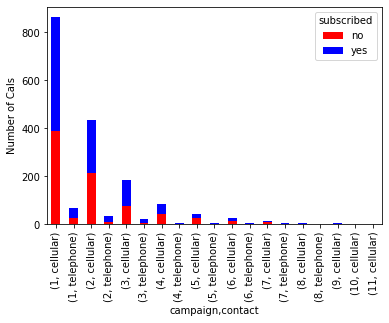

In [0]:
crosstab_CGL = pd.crosstab([df['campaign'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

Both crosstab above are showing that there is no difference if cellular or telephone was used. <br/>
In most cases subscription was set to yes after one call

# **G. CONCLUSION**
In this notebook I have explored bank dataset to understand if there is any connection between Client Subscription and attributes that define number of calls for Current and previous campaign, and also on attributes which contain duration amount for total call per Client. I also looked at contact type to see if different contact type would be more beneficial for subscribing. And lastly, I looked at age, to try and understand if different age Clients are more prone to subscribing.  

From dataset, we can see that there are 2000 clients.<br/>
12 clients don’t have recorded age, so we will assume that age range is between 18 and 93. <br/>
There is equal amount of Clients that subscribed and once that didn’t.  But we can notice that under previous campaign, poutcome have highest amount of failure value.

Under previous campaign, we can see that there is the highest number of Clients that previously didn’t receive any call, there is high enough number of clients that received 1 call, and just little bit less of clients that received 2 calls.
After that amount off calls is less and less. Some clients even received more than 50 calls.<br/>
For current campaign, we can see similar behaviour, the most clients received 1 call and there is just several that received more than 5   

We can see that there are much more calls made per single user under previous calls, then what is made under current campaign. This is as expected, because previous calls contains number of several previous campaigns. 
One think that was noticed is, that more calls per clients doesn’t guarantee more subscriptions. 
But, duration of the call affects subscription status; longer calls will get more subscriptions, and this would be the same for cellular and for the telephones contact type.
<br/>
Length of the call is more important then number of the calls to get client subscribed
 
By looking at the age, we can see that  clients over 65 and under 20 are all subscribed  
